In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [27]:
df = pd.read_csv('E:\ASHII\T1_HOUSE PRICE PREDICTION USING DA\data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [28]:
df.shape

(4600, 18)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [30]:
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

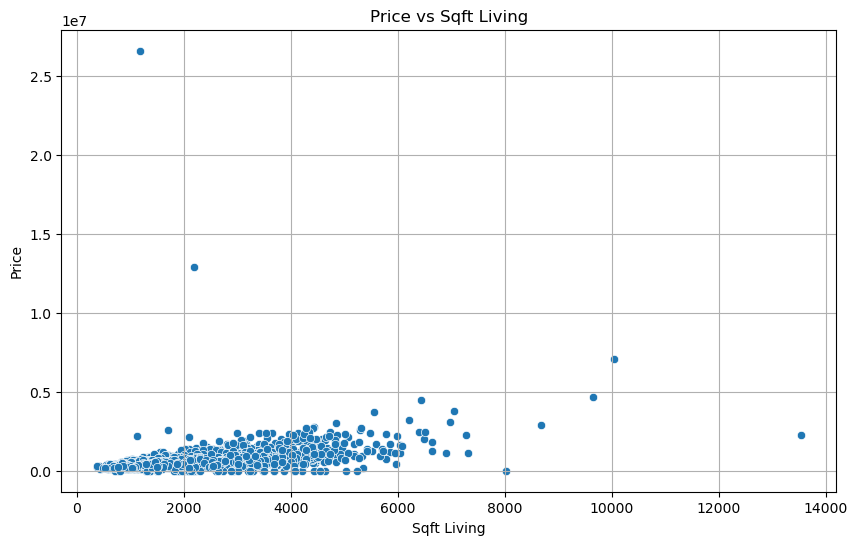

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.grid(True)
plt.show()

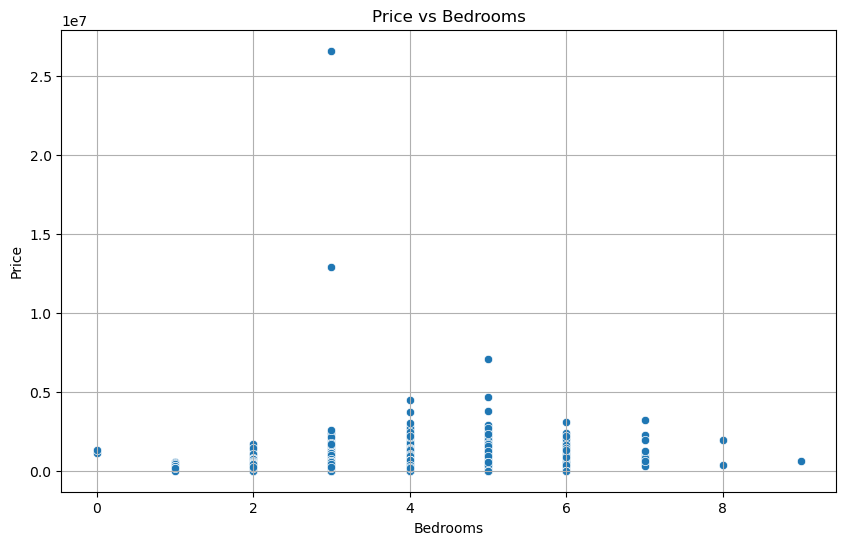

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

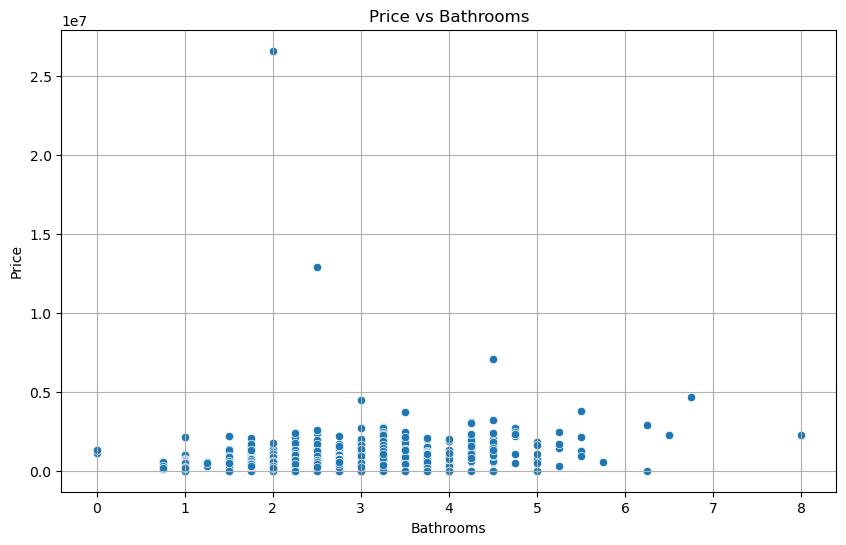

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

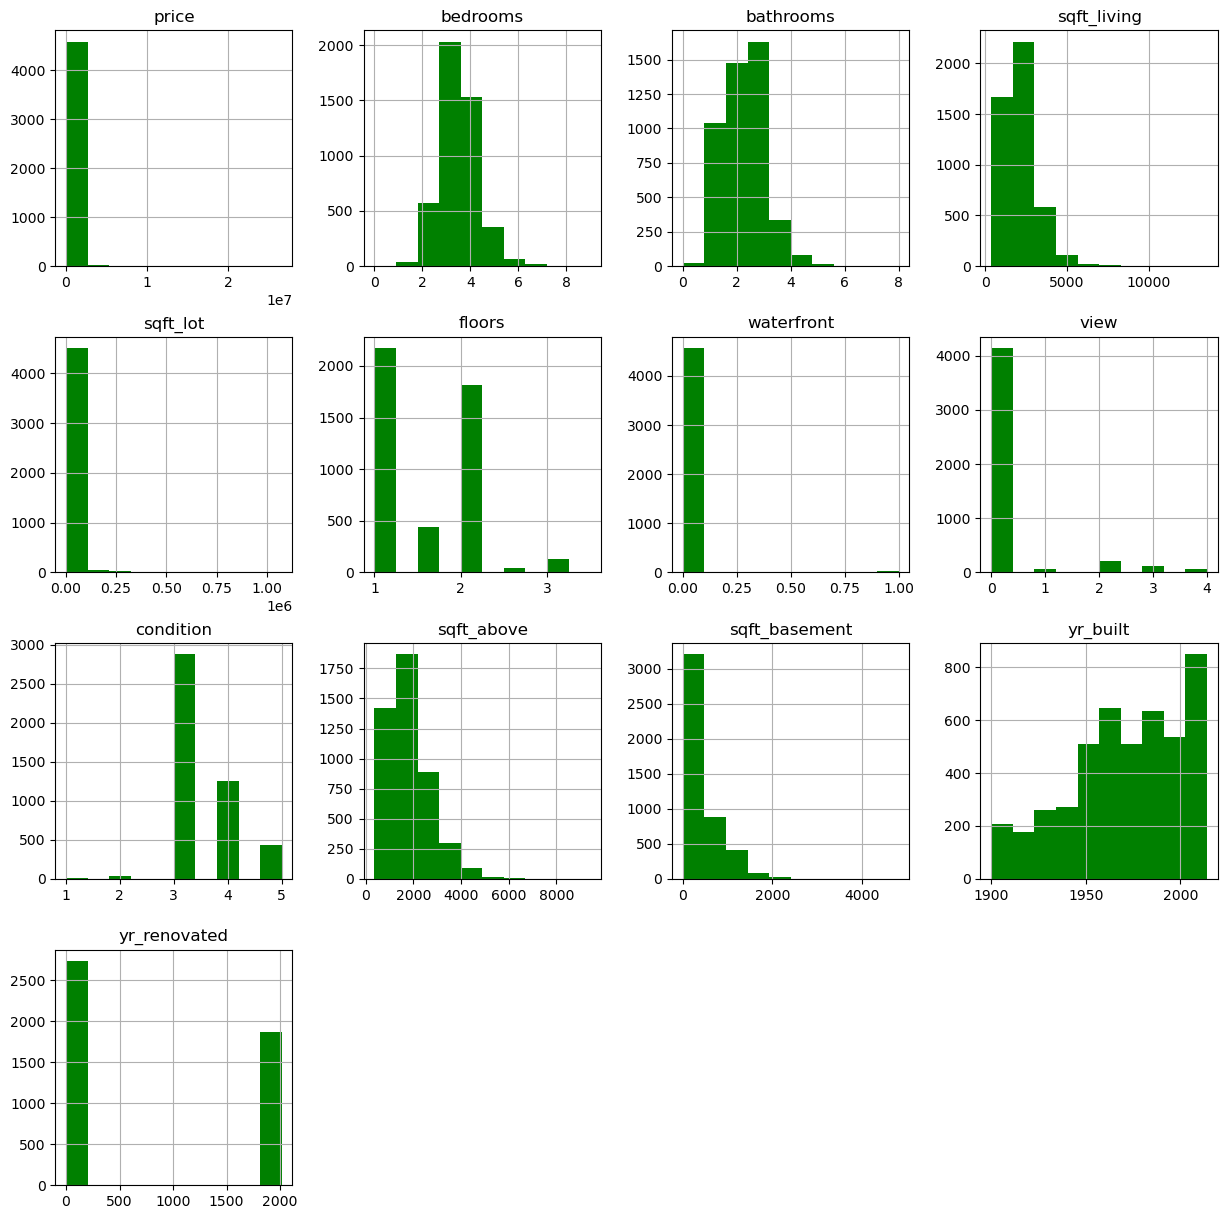

In [35]:
df.hist(figsize=(15, 15), xlabelsize=10, ylabelsize=10,color='green');

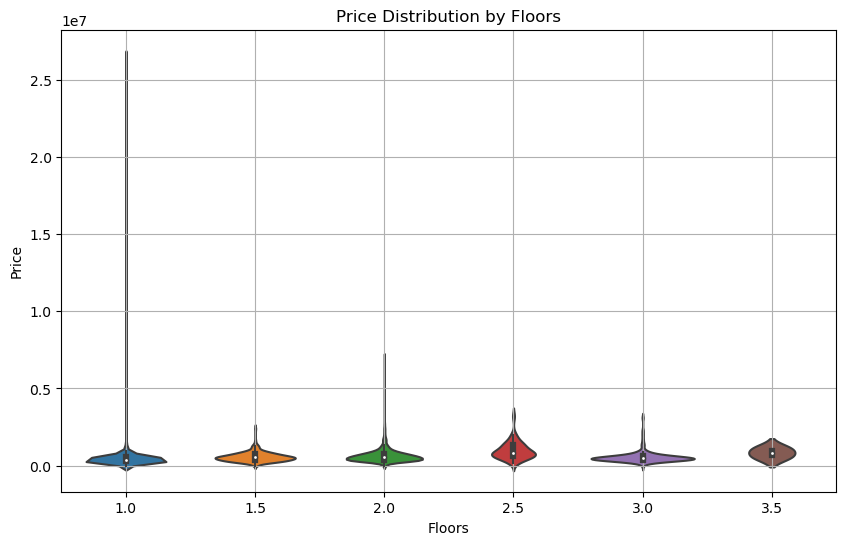

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='floors', y='price', data=df)
plt.title('Price Distribution by Floors')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [37]:
df1=df.drop(['date','street','city','statezip','country'],axis='columns')
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


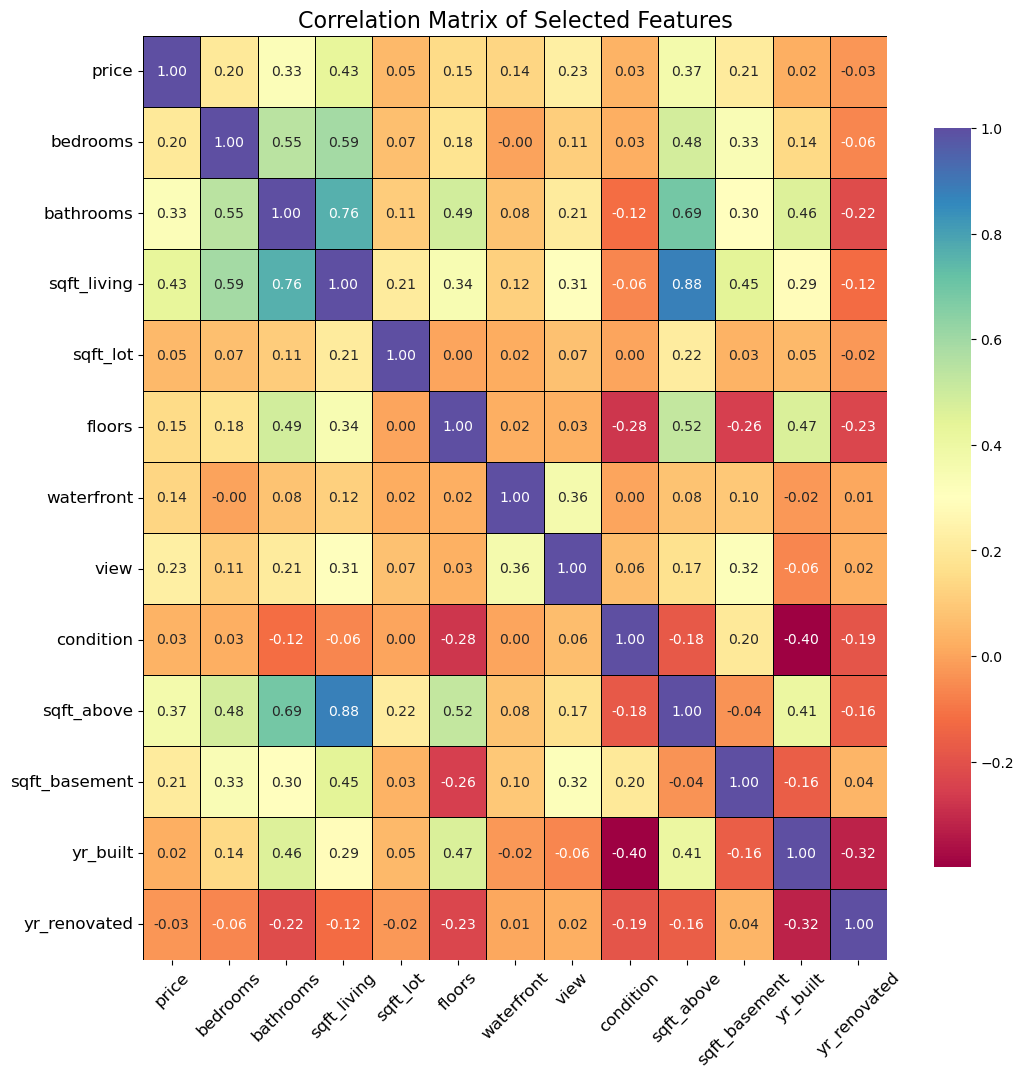

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df1.corr(method="pearson")

# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Spectral', cbar_kws={'shrink': .8}, 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Customize the plot
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()

In [39]:
df2=corr_matrix.index[abs(corr_matrix['price'])>=0.3].tolist()
df2.remove('price')   
print(df2)

['bathrooms', 'sqft_living', 'sqft_above']


In [40]:
y=df['price']
x=df[df2]
scaler = StandardScaler() 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [41]:
len(x_train)

4140

In [42]:
len(x_test)

460

In [43]:
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)
y_test_pred_lr=linear_regression.predict(x_test)
linear_regression_acc=r2_score(y_test,y_test_pred_lr)
print(f'Linear Regression Test accuracy: {linear_regression_acc}')

Linear Regression Test accuracy: 0.14556514879974536


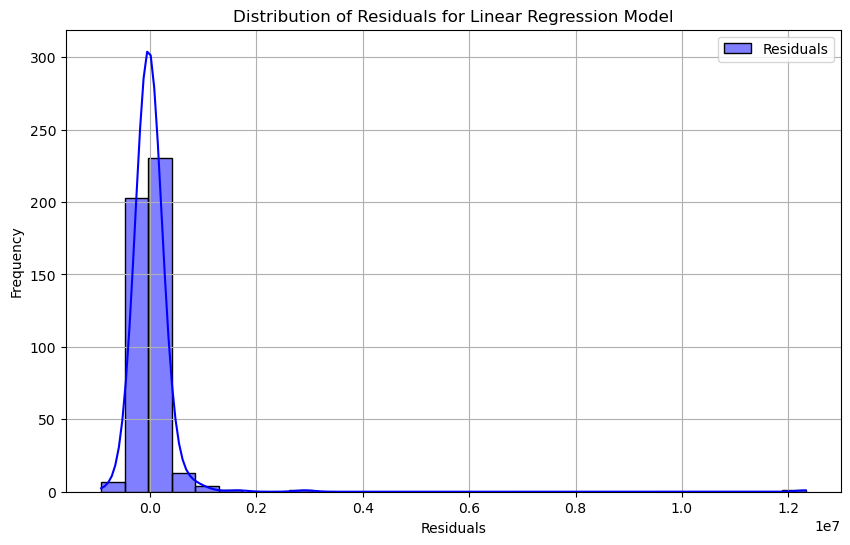

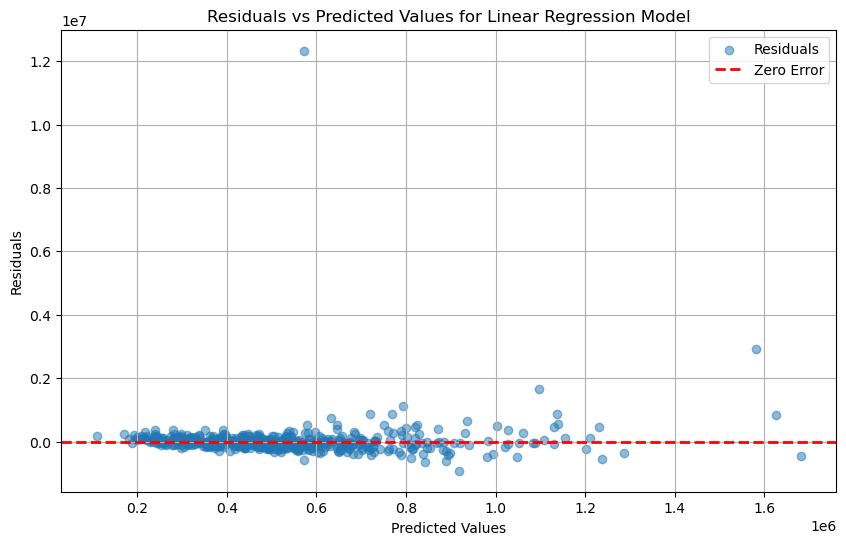

In [44]:
residuals = y_test - y_test_pred_lr

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30, label='Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals for Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_lr, residuals, alpha=0.5, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
y_test_pred_ridge = ridge.predict(x_test)
ridge_acc = r2_score(y_test, y_test_pred_ridge)
print(f'Ridge Regression Test accuracy: {ridge_acc}')

Ridge Regression Test accuracy: 0.1455651695873854


In [46]:
lasso = Lasso(alpha=0.5)
lasso.fit(x_train, y_train)
y_test_pred_lasso = lasso.predict(x_test)
lasso_acc = r2_score(y_test, y_test_pred_lasso)
print(f'Lasso Regression Test accuracy: {lasso_acc}')

Lasso Regression Test accuracy: 0.14556518389825746


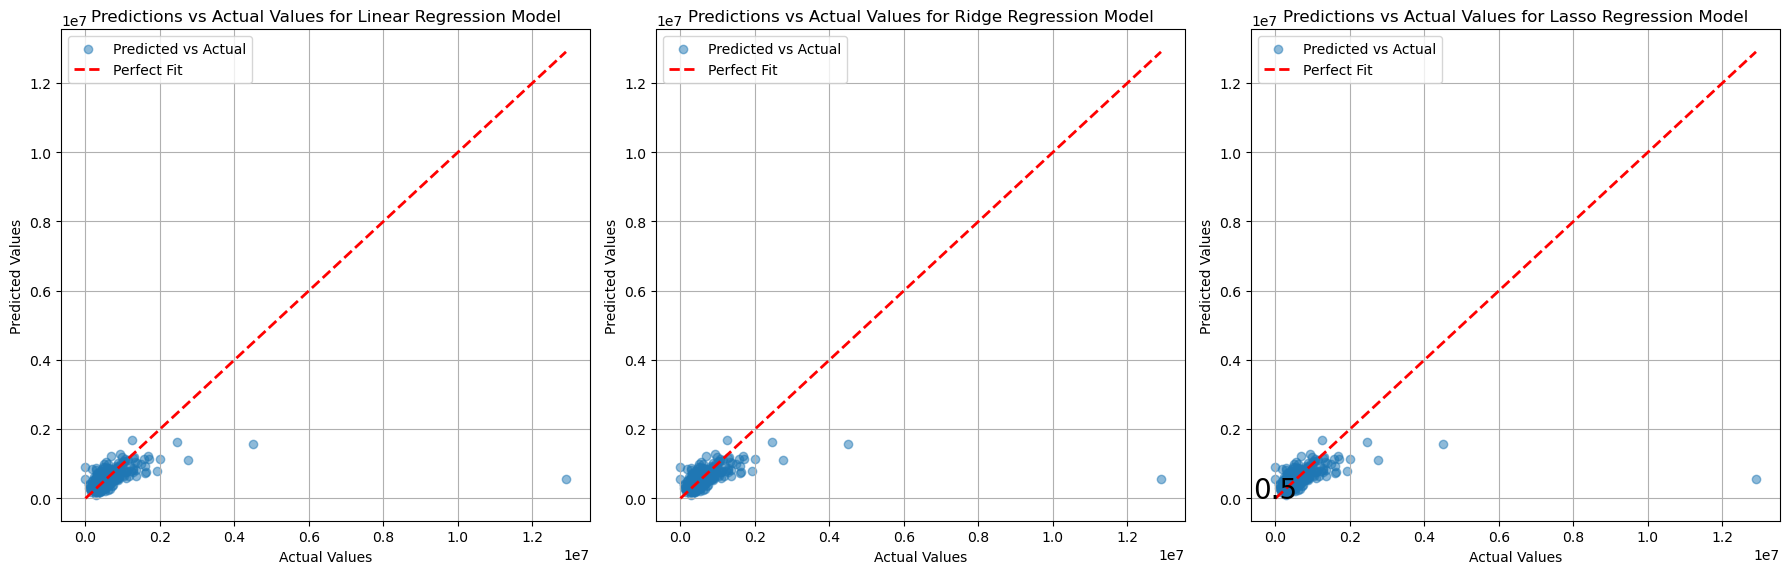

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot: Linear Regression
axes[0].scatter(y_test, y_test_pred_lr, alpha=0.5, label='Predicted vs Actual')
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Predictions vs Actual Values for Linear Regression Model')
axes[0].legend()
axes[0].grid(True)

# Second subplot: Ridge Regression
axes[1].scatter(y_test, y_test_pred_ridge, alpha=0.5, label='Predicted vs Actual')
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Predictions vs Actual Values for Ridge Regression Model')
axes[1].legend()
axes[1].grid(True)

# Third subplot: Lasso Regression
axes[2].scatter(y_test, y_test_pred_lasso, alpha=0.5, label='Predicted vs Actual')
axes[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')
axes[2].set_title('Predictions vs Actual Values for Lasso Regression Model')
axes[2].legend()
axes[2].grid(True)

axes[2].text(0.5, 0.5, 0.5, fontsize=20, ha='center') # Placeholder text

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()